# Assignment 2
**Due date** December 6th, 2024.

Please fo not forget to add your names, student IDs, and emails in this file.<br>
**Only submit one file per team**

**Michael Cornish**, 400437974, cornishm@mcmaster.ca
<br>
Luvlyn Kotian, 400305478, kotianl@mcmaster.ca

<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Assigments/assigment_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [84]:
# load the required libraries that you will need for this assignment
#  [5 marks]
# loading any libraries in other cells will deduct you marks.4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


## (Q1) Linear Regression
* For **Q1** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

To Do: Write an introduction to the linear regression. <br>

The following data is based on a Polynomial expansion to predict the electronic energy of methane for different geometries. <br>
We will follow the work presented in the paper, [paper link](https://pubs.acs.org/doi/full/10.1021/acs.jctc.9b00043)<br>
"*Using Gradients in Permutationally Invariant Polynomial Potential Fitting: A Demonstration for CH4 Using as Few as 100 Configurations*".

The main idea is to expand the inter-atomic distance of the 5 atoms in terms on a polynomial expansion,
$$
y = \sum^{np}_{i} w_i \phi_i(\mathbf{r})
$$
where $w_i$ are the weights, $\phi_i$ are the Permutationally Invariant Polynomial expansion, and $\mathbf{r}$ are the inter-atomic distances.

In the dataset provided, the values of the vector $\mathbf{\phi}(\mathbf{r})^\top = [\phi_0(\mathbf{r}),\cdots,\phi_{np}(\mathbf{r})]$, are in each column of a raw, with the respective energy in the last column.


## (Q1.A) Data preprocessing
1. Load the dataset from the provided link and print the first few rows.<br>
    (https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv)<br>
    1. Answer the following questions,
       1. How many points does the dataset contains?
       2. What is the point with the lowest energy and what is its value?
       3. What is the range of energies in the dataset?
       4. Do a histogram of the energy.
   

   Unnamed: 0  phi_0     phi_1     phi_2     phi_3     phi_4     phi_5  \
0           0    1.0  0.206794  0.047658  0.016033  0.004927  0.000189   
1           1    1.0  0.204853  0.047194  0.015728  0.004834  0.000186   
2           2    1.0  0.202104  0.046530  0.015310  0.004705  0.000180   
3           3    1.0  0.199966  0.046054  0.014993  0.004608  0.000176   
4           4    1.0  0.199642  0.046051  0.014946  0.004597  0.000175   

      phi_6     phi_7     phi_8  ...    phi_21    phi_22    phi_23    phi_24  \
0  0.004928  0.000757  0.010698  ...  0.001659  0.000255  0.000255  0.000039   
1  0.004834  0.000740  0.010509  ...  0.001613  0.000248  0.000248  0.000038   
2  0.004699  0.000718  0.010226  ...  0.001549  0.000238  0.000238  0.000037   
3  0.004601  0.000703  0.010000  ...  0.001499  0.000231  0.000230  0.000036   
4  0.004596  0.000703  0.009966  ...  0.001492  0.000229  0.000229  0.000036   

     phi_25    phi_26    phi_27    phi_28    phi_29     energy  
0  0.0000

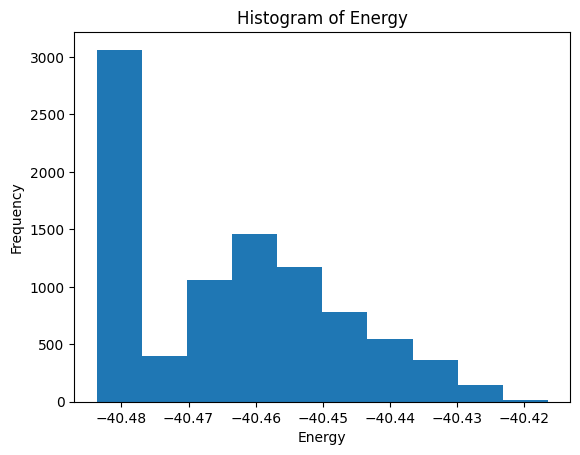

In [85]:
url = "https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv"
df = pd.read_csv(url)
df.head()
print(df.head())

# Q1: How many points?

print("Number of points: ", len(df))

# Q2: Point with the lowest energy and its value?

min_value = df.min().min()
location = df.stack()[df.stack() == min_value].index.tolist()
print("Point with the lowest energy: ", location)
print("Value: ", min_value)

# Q3: Range of the energies?

range_of_energies = df['energy'].max() - df['energy'].min()
print("Range of energies: ", range_of_energies)

# Q4: Histogram of the energy

plt.hist(df['energy'], bins=10)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Energy')
plt.show()



## (Q1.B) Data splitting fitting
Before you carry each of these three different strategies to find the optimal mode, you first need to,
   1. Sample **100** random points (training points), and other **500** random points (test points). <br>
   Use the randomly sampled 100 points only for training, and the other 500 to test accuracy of the three different models. <br>

In [100]:
# Sample points

training = df.sample(n=100, random_state=19)
test = df.drop(training.index).sample(n=500, random_state=19)

x_training = training.drop('energy', axis=1)
y_training = training['energy']
x_test = test.drop('energy', axis=1)
y_test = test['energy']

# not running

## (Q1.C) Model fitting,
The main goal of this section is to train this regression model using,
   1. Exact solution
   2. Gradient descent
      1. Do not forget to play around with the $\eta$ parameter for gradient descent,
      2. How many iterations do you need to reach a "good" model.
      3. Plot the value of the training error as a function of the iterations in gradient descent, (this is known as **learning curves**).
   3. SVD for linear regression

**Extra results you need to include,**
1. In a single figure, plot the vector of the optimal linear weights of the three models, label each curve.
2. For each model, create a figure where you plot **predicted vs true** values of the training and test points (use different symbols to identify training and test points). <br>
In each figure, also display the [$r^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) value.
3. What of the three models had the best performance?
4. Choose the model with the lowest test error, you can use root mean squared error, and see how much the test error will change if we sample another *100* points from the untouched data as the new training points.
Do this 5 times so we can compute the mean and standard deviation of the test error.


Number of points:  9000
Point with the lowest energy:  [(130, 'energy')]
Value:  -40.48363
Range of energies:  0.06712599999999469


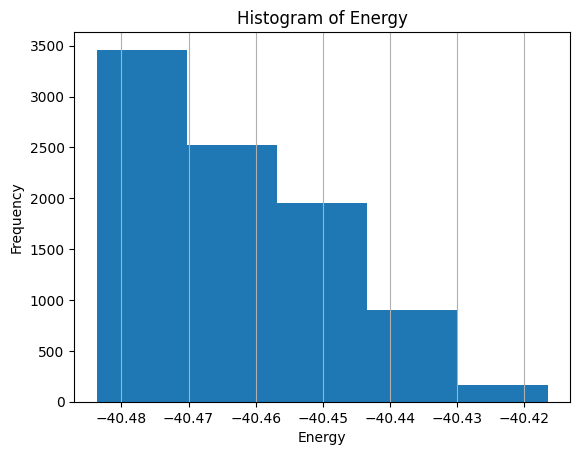

In [87]:
# Q1.A. Data preprocessing

# load data using pandas
url = "https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv"
df = pd.read_csv(url)
df.head()

# 1. How many points does the dataset contains?
print("Number of points: ", len(df))

# 2. What is the point with the lowest energy and what is its value?
min_value = df.min().min()
location = df.stack()[df.stack() == min_value].index.tolist()
print("Point with the lowest energy: ", location)
print("Value: ", min_value)

# 3. What is the range of energies in the dataset? The energy is reported in Hartree
range_of_energies = df['energy'].max() - df['energy'].min()
print("Range of energies: ", range_of_energies)

# 4. Do a histogram of the energy.
plt.hist(df['energy'], bins=5)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Energy')
plt.grid(True, axis='x')

plt.show()


In [88]:
# Q1.B Data splitting for training and testing.
# code here,
training = df.sample(n=100, random_state=12)
test = df.drop(training.index).sample(n=500, random_state=15)

x_training = training.drop('energy', axis=1)
y_training = training['energy']

x_test = test.drop('energy', axis=1)
y_test = test['energy']

x_training_augment = np.hstack((np.ones((x_training.shape[0], 1)), x_training))
x_test_augment = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

[-2.00677489e+01  6.36996090e-07 -2.01043095e+01 -3.11058020e+00
  3.01451860e+00 -1.19766819e+01 -2.53795963e+00  2.43832492e-01
  6.93530434e+00 -2.73695005e-01  3.26440865e+01  2.08551712e+00
 -1.18336331e+00 -2.68535574e-01  6.10997009e-02  6.60569766e-02
  2.17657908e-01 -7.18839502e-02  3.34751949e-02 -4.77882056e-03
  1.67574626e-04  9.07631655e-02 -5.35433522e-04  2.50083066e+00
  5.11797673e-01  1.44756390e+00  1.70203921e-01  2.68319840e-02
  3.01397582e-01  4.28309292e-02  4.89284677e+00  5.93740506e-02]
MSE for test set:  9.254597844898376e-06


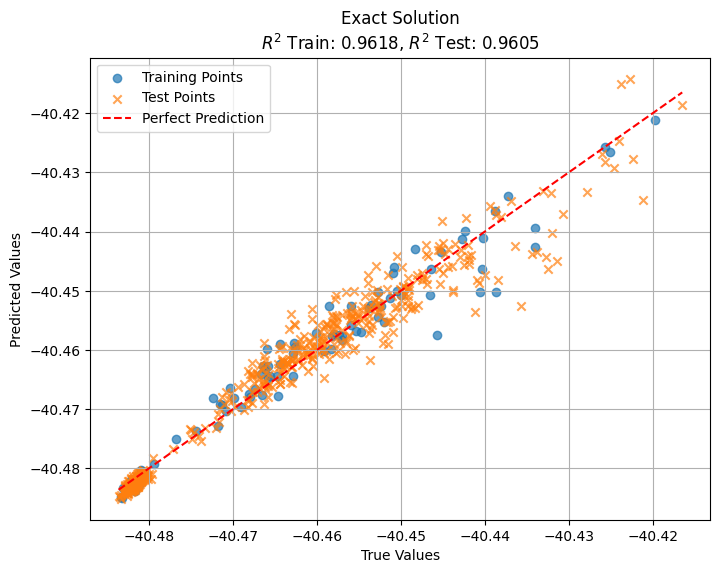

In [89]:
# Q1.C Exact solution of Linear Regression
#code here

exact = np.linalg.pinv(x_training_augment.T @ x_training_augment) @ x_training_augment.T @ y_training
print(exact)

# Predictions on test

y_pred_exact = x_test_augment @ exact

# MSE for test set

mse_exact = np.mean((y_test - y_pred_exact)**2)
print("MSE for test set: ", mse_exact)


## Extras needed (Graphs etc)

def r2_score_manual(y_true, y_pred):
    """Compute R2 score manually using NumPy."""
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

def plot_predictions(y_training, y_training_pred, y_test, y_test_pred, title):
    plt.figure(figsize=(8, 6))

    # Plot training points
    plt.scatter(y_training, y_training_pred, label="Training Points", alpha=0.7, marker="o")
    # Plot test points
    plt.scatter(y_test, y_test_pred, label="Test Points", alpha=0.7, marker="x")

    # Perfect prediction line
    min_val = min(y_training.min(), y_test.min())
    max_val = max(y_training.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")

    # Calculate R^2 scores
    r2_train = r2_score_manual(y_training, y_training_pred)
    r2_test = r2_score_manual(y_test, y_test_pred)

    # Add annotations
    plt.title(f"{title}\n$R^2$ Train: {r2_train:.4f}, $R^2$ Test: {r2_test:.4f}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_predictions(
    y_training, np.dot(x_training_augment, exact),
    y_test, np.dot(x_test_augment, exact),
    title="Exact Solution"
)


Any NaN in x_training_aug? False
Any Inf in x_training_aug? False
Converged after 135 iterations


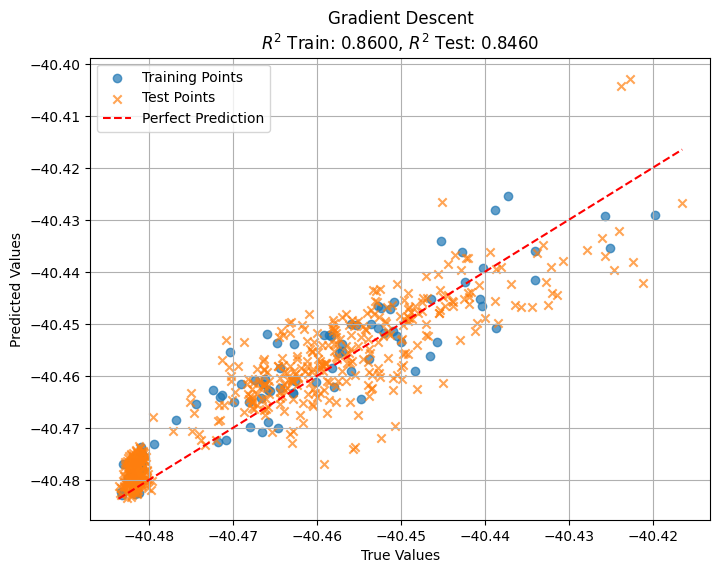

In [90]:
# Q1.C Gradient descent for Linear Regression
# code here

#### Was having issues with nan values from phi 0, had to use this to correct it



# Check for features with zero variance
std_dev = x_training.std(axis=0)
non_zero_std_mask = std_dev != 0
x_training = x_training.loc[:, non_zero_std_mask]
x_test = x_test.loc[:, non_zero_std_mask]

# Normalize features
x_training_norm = (x_training - np.mean(x_training, axis=0)) / np.std(x_training, axis=0)
x_test_norm = (x_test - np.mean(x_training, axis=0)) / np.std(x_training, axis=0)

# Add bias term
x_training_aug = np.hstack((np.ones((x_training_norm.shape[0], 1)), x_training_norm))
x_test_aug = np.hstack((np.ones((x_test_norm.shape[0], 1)), x_test_norm))

# Debugging: Check for NaN or Inf
print("Any NaN in x_training_aug?", np.any(np.isnan(x_training_aug)))
print("Any Inf in x_training_aug?", np.any(np.isinf(x_training_aug)))

# Gradient Descent
eta = 0.035
iterations = 1000
tolerance = 1e-6
errors = []

w = np.zeros(x_training_aug.shape[1])  # Initialize weights

for i in range(iterations):
    y_pred = np.dot(x_training_aug, w)
    gradient = -2 * np.dot(x_training_aug.T, (y_training - y_pred)) / len(y_training)
    w -= eta * gradient

    error = np.mean((y_training - y_pred)**2)
    errors.append(error)

    if len(errors) > 1 and abs(errors[-1] - errors[-2]) < tolerance:
        print(f"Converged after {i+1} iterations")
        break

# Predictions
y_pred_train = np.dot(x_training_aug, w)
y_pred_test = np.dot(x_test_aug, w)

# Plot Predictions
plot_predictions(
    y_training, y_pred_train,
    y_test, y_pred_test,
    title="Gradient Descent"
)


[-4.04633382e+01  2.33617547e-05 -2.11697896e-01  8.22776902e-02
  5.25870381e-02  1.20745251e-01 -5.97761560e-02  1.52289870e-01
 -2.66416193e-01  2.05312534e-01 -4.06347326e-02  7.20173123e-03
 -9.69662536e-02 -2.22710151e-01  2.26888240e-01 -2.98019545e-02
  2.28206600e-01  3.27049850e-01 -1.89754860e-01 -6.20297417e-02
  1.29247355e-01 -6.91451923e-02 -3.26843482e-02 -8.56426130e-02
 -9.39464284e-02 -5.55794826e-02 -1.52035131e-02 -6.81771211e-02
  6.16113510e-02 -3.44702562e-02  4.01811168e-02]
1.802085640507565e-06


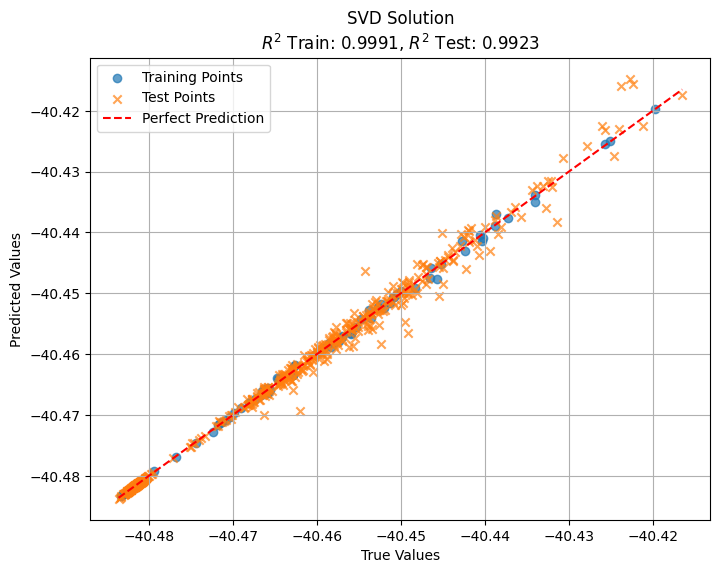

In [91]:
# Q1.C SVD for Linear Regression
# code here

u, s, vh = np.linalg.svd(x_training_aug, full_matrices=False)
s_inv = np.diag(1 / s)
w_svd = vh.T @ s_inv @ u.T @ y_training
print(w_svd)

y_pred_svd = x_test_aug @ w_svd
mse_svd = np.mean((y_test - y_pred_svd)**2)
print(mse_svd)

def r2_score_manual(y_true, y_pred):
    """Compute R2 score manually using NumPy."""
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

# Function to plot predicted vs. true values
def plot_predictions(y_training, y_training_pred, y_test, y_test_pred, title):
    plt.figure(figsize=(8, 6))

    # Plot training points
    plt.scatter(y_training, y_training_pred, label="Training Points", alpha=0.7, marker="o")
    # Plot test points
    plt.scatter(y_test, y_test_pred, label="Test Points", alpha=0.7, marker="x")

    # Perfect prediction line
    min_val = min(y_training.min(), y_test.min())
    max_val = max(y_training.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")

    # Calculate R^2 scores
    r2_train = r2_score_manual(y_training, y_training_pred)
    r2_test = r2_score_manual(y_test, y_test_pred)

    # Graph specifics
    plt.title(f"{title}\n$R^2$ Train: {r2_train:.4f}, $R^2$ Test: {r2_test:.4f}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()


# Plotting the results
plot_predictions(
    y_training, np.dot(x_training_aug, w_svd),
    y_test, np.dot(x_test_aug, w_svd),
    title="SVD Solution"
)

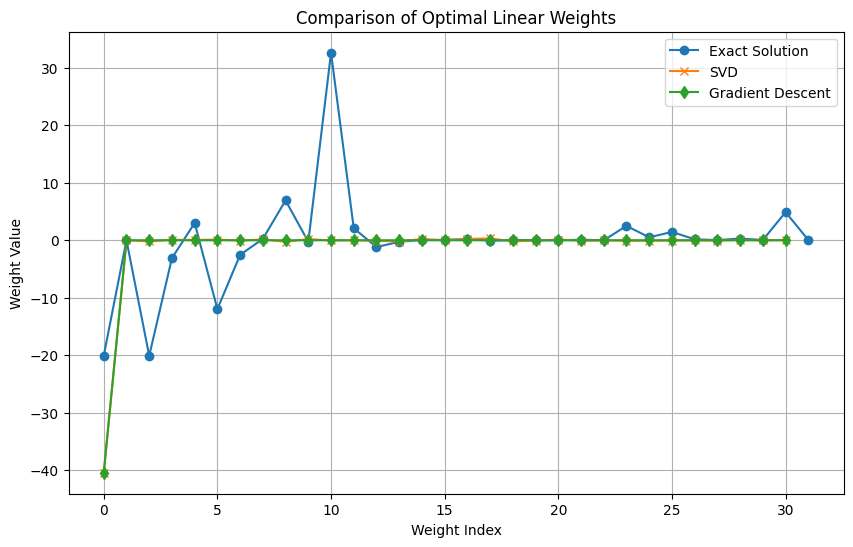

In [92]:
# Plot the weights
plt.figure(figsize=(10, 6))
plt.plot(exact, label="Exact Solution", marker="o")
plt.plot(w_svd, label="SVD", marker="x")
plt.plot(w, label="Gradient Descent", marker="d")
plt.xlabel("Weight Index")
plt.ylabel("Weight Value")
plt.title("Comparison of Optimal Linear Weights")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# Compute which model has the best performance

# Fix exact term, kept having issues with wrong (n,n) with exact having 31 instead of 32
# Using the augmented matrix with the bias term
exact = np.linalg.inv(x_training_aug.T @ x_training_aug) @ x_training_aug.T @ y_training

import numpy as np

def compute_rmse(y_true, y_pred):

    return np.sqrt(np.mean((y_true - y_pred) ** 2))


# Compute RMSE for each model
rmse_exact = compute_rmse(y_test, x_test_aug @ exact)
rmse_svd = compute_rmse(y_test, x_test_aug @ w_svd)
rmse_gd = compute_rmse(y_test, x_test_aug @ w)

print(f"Exact Solution RMSE: {rmse_exact:.4f}")
print(f"SVD RMSE: {rmse_svd:.4f}")
print(f"Gradient Descent RMSE: {rmse_gd:.4f}")



Exact Solution RMSE: 0.0013
SVD RMSE: 0.0013
Gradient Descent RMSE: 0.0060


#### **ANSWER: Exact Solution and SVD have the same RMSE in this case.**

Could run more trials to get different RMSE and average them out to find which model is better over a repeatable set of trials:



In [94]:
### USING EXACT SOLUTION FOR 5 MORE TRIALS


# Ensure that the number of features in training and test data match
if x_training.shape[1] != x_test.shape[1]:
    print(f"Feature mismatch between training and test data: {x_training.shape[1]} vs {x_test.shape[1]}")
    # If needed, slice the training data to match test data features
    x_training = x_training[:, :x_test.shape[1]]

# Initialize list to store RMSE values from each run
rmse_values = []

# Perform 5 runs
for i in range(5):
    print(f"\nRun {i+1}:")

    # Sample 100 points from the original training data
    training_sample = df.sample(n=100, random_state=i)
    x_new_train = training_sample.iloc[:, :-1].to_numpy()  # Features (exclude target)
    y_new_train = training_sample.iloc[:, -1].to_numpy()   # Target

    # Ensure feature count matches between training and test data
    if x_new_train.shape[1] != x_test.shape[1]:
        x_new_train = x_new_train[:, :x_test.shape[1]]

    # Fit the exact solution to the new training data
    exact_new = np.linalg.pinv(x_new_train.T @ x_new_train) @ x_new_train.T @ y_new_train
    print("Shape of exact_new:", exact_new.shape)  # Should be (30,)

    # Compute predictions on the test data using the new exact solution
    y_pred_new = x_test @ exact_new
    print("Shape of y_pred_new:", y_pred_new.shape)  # Should match y_test

    # Compute RMSE for this run
    rmse_test = np.sqrt(np.mean((y_test - y_pred_new) ** 2))
    rmse_values.append(rmse_test)
    print(f"RMSE for Run {i+1}: {rmse_test:.4f}")

# Compute mean and standard deviation of RMSE values
mean_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)

print(f"\nMean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")



Run 1:
Shape of exact_new: (30,)
Shape of y_pred_new: (500,)
RMSE for Run 1: 32.4894

Run 2:
Shape of exact_new: (30,)
Shape of y_pred_new: (500,)
RMSE for Run 2: 32.4124

Run 3:
Shape of exact_new: (30,)
Shape of y_pred_new: (500,)
RMSE for Run 3: 32.4137

Run 4:
Shape of exact_new: (30,)
Shape of y_pred_new: (500,)
RMSE for Run 4: 32.4133

Run 5:
Shape of exact_new: (30,)
Shape of y_pred_new: (500,)
RMSE for Run 5: 32.4246

Mean RMSE: 32.4307
Standard Deviation of RMSE: 0.0297


# (Q2) Newton's method for Nonlinear set of equations

* For **Q2** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

Let's consider the following reactions,
$$
ScF_3(s) \to Sc^{3+}(aq) + 3F^{-}(aq), \;\; K_{sp} = 4.2\times10^{-18}\\
HF(aq) + H_2O \to H_3O^{+}(aq) + F^{-}(aq), \;\; K_{a} = 5.6\times10^-4\\
2H_2O \to H_3O^{+} + OH^{-}(aq), \;\; K_w = 10^{-14}
$$


We can write the concentration values for each species at equilibrium using three main variables, $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
These give us the following relations,
$$
K_{sp} = x_{sp}(3x_{sp}+ x_a)^3 \\
K_{a} = \frac{(x_{a}+x_w)(3x_{sp} + x_a)}{-x_a} \\
K_w = (x_a+x_w)(x_w)
$$

You can use the following initial values for each species,
1. $x_{sp} = 2\times^{-5}$
2. $x_a = -6.2\times^{-4}$
3. $x_w = 6.2\times^{-4}$
   
```x0 = np.array([2E-5,-6.2E-4,62E-4])```. <br>

 <br>

**Results to include,**
1. Implement the Vector function to find $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
2. Implement the Jacobian function.
3. Implement the Newton's method step function.
4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.
5. The value of the concentrations.
6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.
7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.


In [101]:
# equili constants
Ksp = 4.2E-18
Ka = 5.6E-4
Kw = 1E-14
k = np.array([Ksp,Ka,Kw])

#inital values
xsp = 2E-5
xa = -6.2E-4
xw = 6.2E-4
x0 = np.array([2E-5, -6.2E-4, 6.2E-4])

#1. Vector Function

def equations_of_motion(x, k):
    f1 = xsp * (3 * xsp + xa)**3 - Ksp  # Ksp
    f2 = (xa + xw) * (3 * xsp + xa) - xa - Ka  # Ka
    f3 = (xa + xw) * xw - Kw  # Kw
    return np.array([f1, f2, f3])

# 2. Jacobian
def jacobian_of_equations_of_motion(x, k):
    xsp, xa, xw = x

    # Partial derivatives of f1
    df1_dxsp = (3 * (3 * xsp + xa)**3) + xsp * 3 * (3 * xsp + xa)**2 * 3
    df1_dxa = 3 * xsp * (3 * xsp + xa)**2
    df1_dxw = 0

    # Partial derivatives of f2
    df2_dxsp = (xa + xw) * 3
    df2_dxa = (3 * xsp + xa) - 1 + (xa + xw) * 1
    df2_dxw = 3 * (xsp + xa)

    # Partial derivatives of f3
    df3_dxsp = 0
    df3_dxa = xw
    df3_dxw = xa + 2 * xw

    # Return the Jacobian matrix
    return np.array([[df1_dxsp, df1_dxa, df1_dxw],
                     [df2_dxsp, df2_dxa, df2_dxw],
                     [df3_dxsp, df3_dxa, df3_dxw]])

    return jacobian_matrix
    print("Jacobian Matrix (J(x)):", jacobian_matrix)

In [102]:
 #3 Newton's method
def newton_step(x0):
    f_values = equations_of_motion(x0, k)
    jac_f = jacobian_of_equations_of_motion(x0, k)
    jac_f_inv = np.linalg.inv(jac_f)
    x = x0 - jac_f_inv @ f_values
    return x

    # NM loop
def run_newtons_method(initial_guess, max_iterations=100, tolerance=1e-4):
    history = [initial_guess]
    for i in range(max_iterations):
        x_next = newton_step(history[-1])
        history.append(x_next)

        # converg.
    if np.linalg.norm(x_next - history[-1]) < tolerance:

        return np.array(history), i + 1
    print(f"reached maximum iterations: [max_iterations]")
    return np.array(history), max_iterations

history, num_iterations = run_newtons_method(x0)

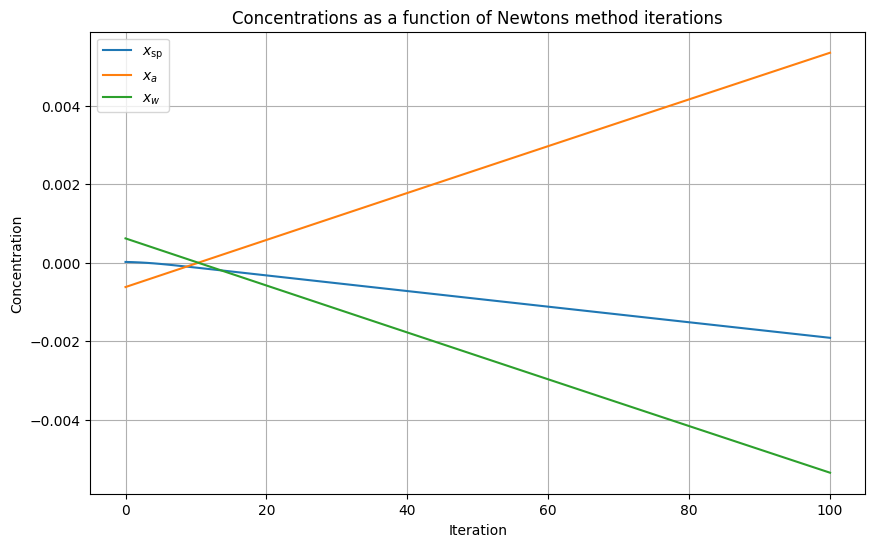

In [103]:
history = np.array(history)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(history)), history[:, 0], label=r'$x_{\text{sp}}$')
plt.plot(np.arange(len(history)), history[:, 1], label=r'$x_a$')
plt.plot(np.arange(len(history)), history[:, 2], label=r'$x_w$')
plt.xlabel('Iteration')
plt.ylabel('Concentration')
plt.title('Concentrations as a function of Newtons method iterations')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
# 6. Check how many iterations are required for the concentration to change less than 1E-4
def newtons_method_check_iterations(x0, tol=1e-4):
    x = np.copy(x0)
    iteration = 0
    change = np.inf

    while change > tol:
        f = equations_of_motion(x,k)
        J = jacobian_of_equations_of_motion(x,k)

        delta_x = np.linalg.solve(J, -f)

        x_new = x + delta_x

        # change in concentration
        change = np.max(np.abs(x_new - x))

        x = x_new
        iteration += 1

    return iteration

# 7. Run the method with a random initial guess
x0_random = np.random.uniform(1E-5, 1E-3, (3,))
iterations_random = newtons_method_check_iterations(x0_random)

print(f"Iterations required with a random initial guess: {iterations_random}")

Iterations required with a random initial guess: 1


# Q3 Molecular orbitals and Diagonalization

# Hückel model
As we saw in class, the Hückel model is one of the most basic models to describe the interaction between electrons in a molecule. <br>
The Hückel model is based on the following assumptions:
1. Only next-nearest neighbors atoms form bonds and if so $S_{ij} = 1$, else $S_{ij} = 0$.
2. The matrix elements of the Hamiltonian are described depending on the type of atom. <br>
   We will follow the notation of the paper, [A Pariser-Parr-Pople-based set of Hueckel molecular orbital parameters](https://pubs.acs.org/doi/abs/10.1021/jo01311a060), <br>
   where the diagonal elements ($h_i$) and off-diagonal elements ($h_{ij}$) are given by,

    $$
    h_{i} = \alpha_0 + h_{X} \beta_0 \\
    h_{ij} = h_{X,Y} \beta_0 \\
    $$
    
Table 1 and 2 from [paper](https://pubs.acs.org/doi/abs/10.1021/jo01311a060) have those respected values.
1. Table 1 $\to$ $h_i$ for different types of atoms.
2. Table 2 $\to$ $ h_{X,Y}$ for different types of atoms, $X$ and $Y$ are the index for the type of atoms that form a bond.

**Results to include,**
1. What is the **HOMO-LUMO** value for Benzene.
2. Plot HOMO or LUMO orbital using the ```plot_benzene_with_lcao_circles()``` function.
   

HOMO: -13.7 eV
LUMO: -9.100000000000001 eV
HOMO-LUMO Gap: 4.599999999999998 eV


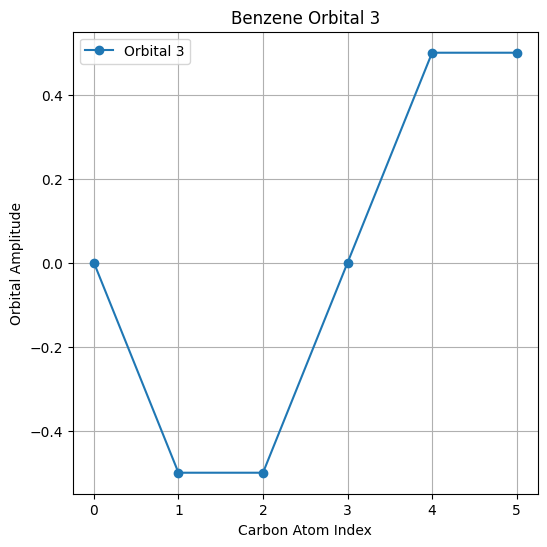

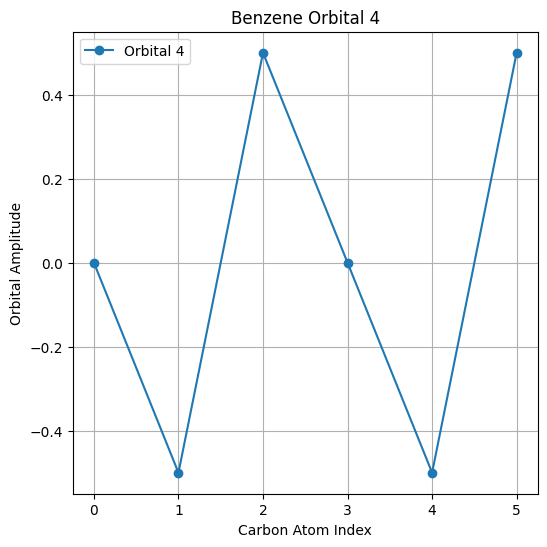

In [105]:
def create_hamiltonian_for_benzene(alpha_0, beta_0):
    H = np.zeros((6, 6))

    np.fill_diagonal(H, alpha_0)

    for i in range(6):
        H[i, (i + 1) % 6] = beta_0
        H[(i + 1) % 6, i] = beta_0

    return H

def diagonalize_hamiltonian(H):
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    return eigenvalues, eigenvectors

def calculate_homo_lumo_gap(eigenvalues):

    eigenvalues_sorted = np.sort(eigenvalues)


    HOMO = eigenvalues_sorted[2]


    LUMO = eigenvalues_sorted[3]

    # Calculate the HOMO-LUMO gap
    gap = (LUMO - HOMO)
    return HOMO, LUMO, gap




def plot_benzene_orbital(eigenvectors, orbital_index):
    # Extract the eigenvector corresponding to the orbital index
    orbital = eigenvectors[:, orbital_index]

    # Plot the LCAO (Linear Combination of Atomic Orbitals)
    plt.figure(figsize=(6, 6))
    plt.plot(np.real(orbital), marker='o', label=f'Orbital {orbital_index + 1}')
    plt.xlabel('Carbon Atom Index')
    plt.ylabel('Orbital Amplitude')
    plt.title(f'Benzene Orbital {orbital_index + 1}')
    plt.grid(True)
    plt.legend()
    plt.show()


def main():
    # Parameters for benzene from the Hückel model
    alpha_0 = -11.4  # Energy of individual atomic orbitals
    beta_0 = -2.3    # Bonding parameter between adjacent carbon atoms

    # Step 1: Create the Hamiltonian matrix
    H = create_hamiltonian_for_benzene(alpha_0, beta_0)

    # Step 2: Diagonalize the Hamiltonian to find eigenvalues and eigenvectors
    eigenvalues, eigenvectors = diagonalize_hamiltonian(H)

    # Step 3: Calculate the HOMO-LUMO gap
    HOMO, LUMO, gap = calculate_homo_lumo_gap(eigenvalues)

    # Display the HOMO-LUMO gap
    print(f'HOMO: {HOMO} eV')
    print(f'LUMO: {LUMO} eV')
    print(f'HOMO-LUMO Gap: {gap} eV')

    # Step 4: Plot the HOMO or LUMO orbital
    orbital_index = 2  # For HOMO (3rd eigenvalue, index 2)
    plot_benzene_orbital(eigenvectors, orbital_index)

    orbital_index = 3  # LUMO (4th eigenvalue, index 3)
    plot_benzene_orbital(eigenvectors, orbital_index)

# Run the main function
if __name__ == "__main__":
    main()

In [106]:
# Define the benzene molecule coordinates
def benzene_positions():
    # 6 evenly spaced points around a circle
    theta = np.linspace(0, 2 * np.pi, 7)[:-1]
    radius = 1.0
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y]).T

# Plot benzene with LCAO magnitudes
def plot_benzene_with_lcao_circles(magnitudes):
    positions = benzene_positions()
    # magnitudes = generate_lcao_magnitudes()

    # Normalize magnitudes for color mapping
    norm = Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
    colormap = plt.cm.viridis

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Plot benzene structure
    for i in range(len(positions)):
        ax.plot(
            [positions[i, 0], positions[(i + 1) % len(positions), 0]],
            [positions[i, 1], positions[(i + 1) % len(positions), 1]],
            'k-', lw=2
        )

    # Plot circles for each carbon atom
    for pos, mag in zip(positions, magnitudes):
        color = colormap(norm(mag))
        circle = plt.Circle(pos, radius=0.2, color=color,
                            edgecolor='black', lw=1)
        ax.add_artist(circle)
        ax.text(pos[0], pos[1], f"{mag:.2f}", fontsize=8,
                ha='center', va='center', color='white')

    # Add colorbar
    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array(magnitudes)
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Magnitude of LCAO")

    # Adjust plot limits and labels
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    plt.title("Benzene with LCAO Magnitudes (Circles by Magnitude)")
    plt.show()


[0.73562993 0.18516443 0.67610195 0.07313982 0.8909722  0.36220651]


<ipython-input-106-7c0ffaefa80b>:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle(pos, radius=0.2, color=color,


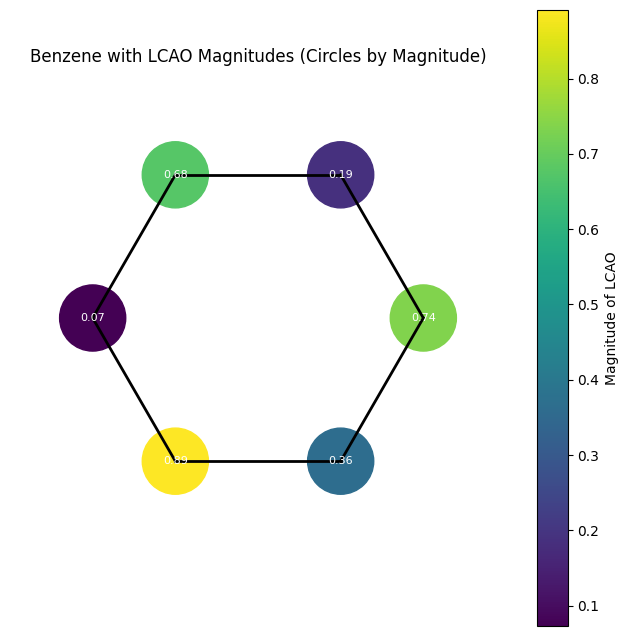

In [107]:
# LCAO data: random magnitudes for data
c = np.abs(np.random.rand(6))
print(c)
plot_benzene_with_lcao_circles(c)